<a href="https://colab.research.google.com/github/punithamuthusamy-ux/Python_code_learning/blob/main/Python_DA_Assignment_2_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Python DA Assignment 2 - Data Visualization**

##1) Loading the Taxis Dataset

In [ ]:
# Import seaborn
import seaborn as sns

# Load the 'taxis' dataset
df = sns.load_dataset("taxis")

##2) Handling Missing Values





In [ ]:
 # Check for missing values in the dataset and identify columns with missing data

df.isnull().sum()


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [ ]:
# Impute missing values using appropriate strategies based on the column type (e.g., using mean, median, or mode for numerical columns, and mode for categorical columns).

# Mean

df['fare'].fillna(df['fare'].mean(), inplace=True)


/tmp/ipython-input-68409727.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare'].fillna(df['fare'].mean(), inplace=True)


In [ ]:
# Median

df['tip'].fillna(df['tip'].median(), inplace=True)



/tmp/ipython-input-3212203142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tip'].fillna(df['tip'].median(), inplace=True)


In [ ]:
# Impute 'payment' with its mode (since it's a categorical column)

df['payment'].fillna(df['payment'].mode()[0], inplace=True)


/tmp/ipython-input-2412210623.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment'].fillna(df['payment'].mode()[0], inplace=True)


In [ ]:
# For columns that are critical and cannot be reasonably imputed, remove rows with missing values to maintain data integrity

df.dropna(inplace=True)


df.isnull().sum()


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


##3) Visualizations using Matplotlib/Pandas Plot

**Line Chart**

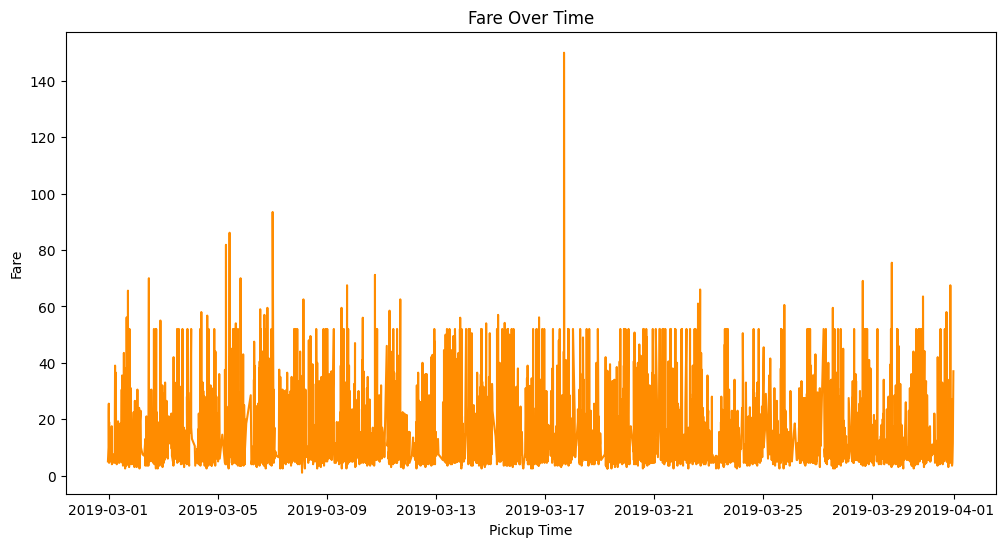

In [ ]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Convert pickup column to datetime and sort
df['pickup'] = pd.to_datetime(df['pickup'])
df = df.sort_values('pickup')

# Line chart
plt.figure(figsize=(12, 6))
plt.plot(df['pickup'], df['fare'], color='darkorange')

plt.xlabel('Pickup Time')
plt.ylabel('Fare')
plt.title('Fare Over Time')
plt.show()

**Bar Chart**

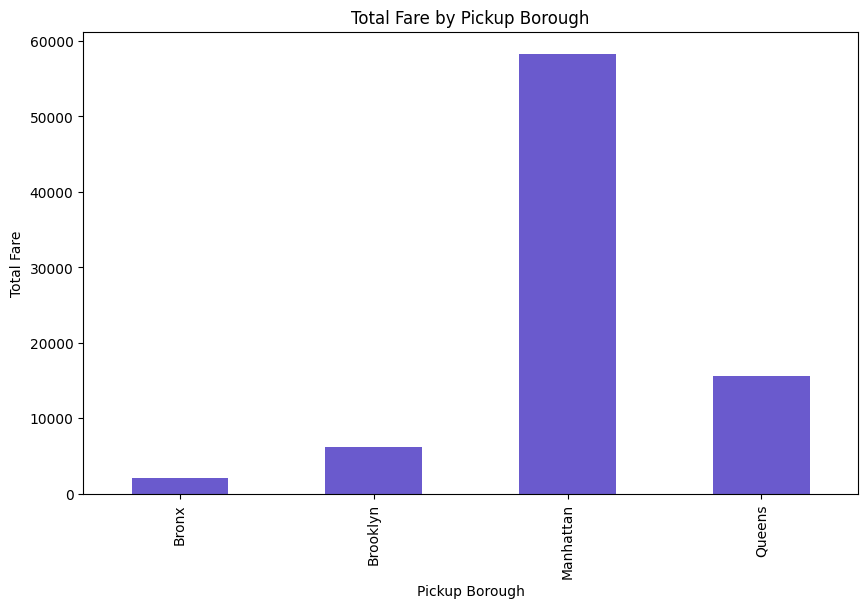

In [ ]:
# Create a bar chart to show the total fare for each pickup_borough. Group the data by pickup_borough and sum the fare for each group

# Sum fare by pickup borough
fare_by_borough = df.groupby('pickup_borough')['fare'].sum()

# Bar chart
plt.figure(figsize=(10, 6))
fare_by_borough.plot(kind='bar', color='slateblue')

plt.xlabel('Pickup Borough')
plt.ylabel('Total Fare')
plt.title('Total Fare by Pickup Borough')
plt.show()



**Pie Chart**

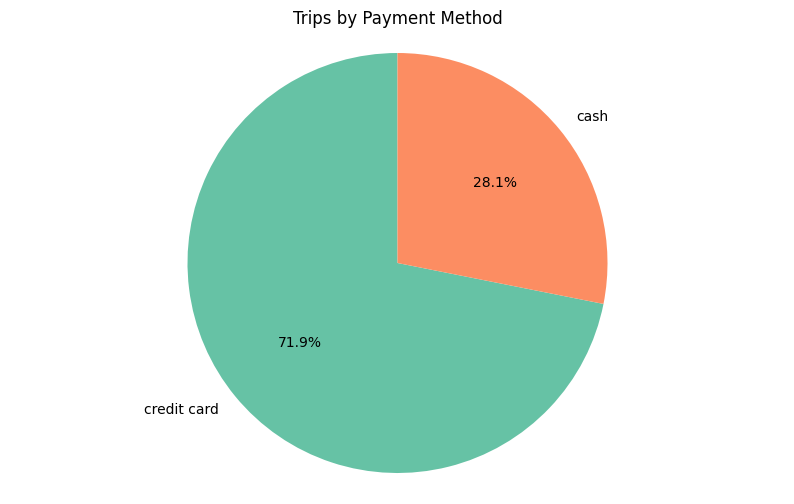

In [ ]:
# Plot a pie chart showing the distribution of trips based on the payment method (credit card, cash, etc.). Each slice should represent the count of trips for a specific payment method

# Count payment methods
payment_counts = df['payment'].value_counts()

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(payment_counts,
        labels=payment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set2.colors)

plt.title('Trips by Payment Method')
plt.axis('equal')
plt.show()



**Histogram**

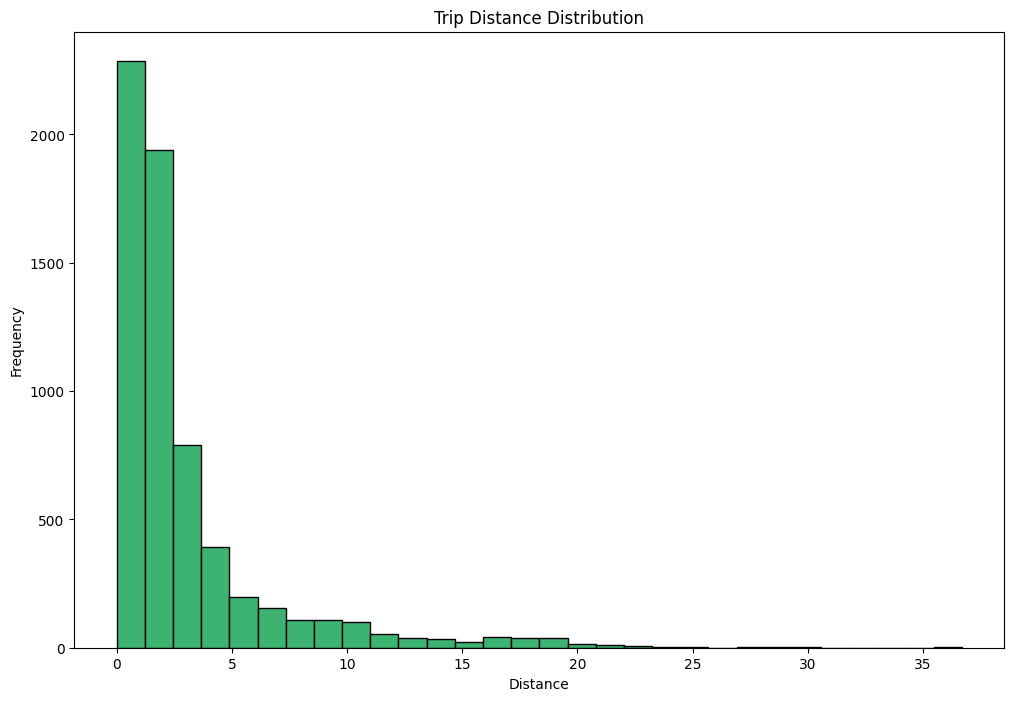

In [ ]:
# Create a histogram to visualize the distribution of distance. Customize the number of bins for better granularity and ensure the plot is easy to interpret

# Histogram
plt.figure(figsize=(12, 8))
plt.hist(df['distance'], bins=30, color='mediumseagreen', edgecolor='black')

plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Trip Distance Distribution')
plt.show()


**Box Plot**

/tmp/ipython-input-2984822268.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pickup_borough', y='tip', data=df, palette='cool')


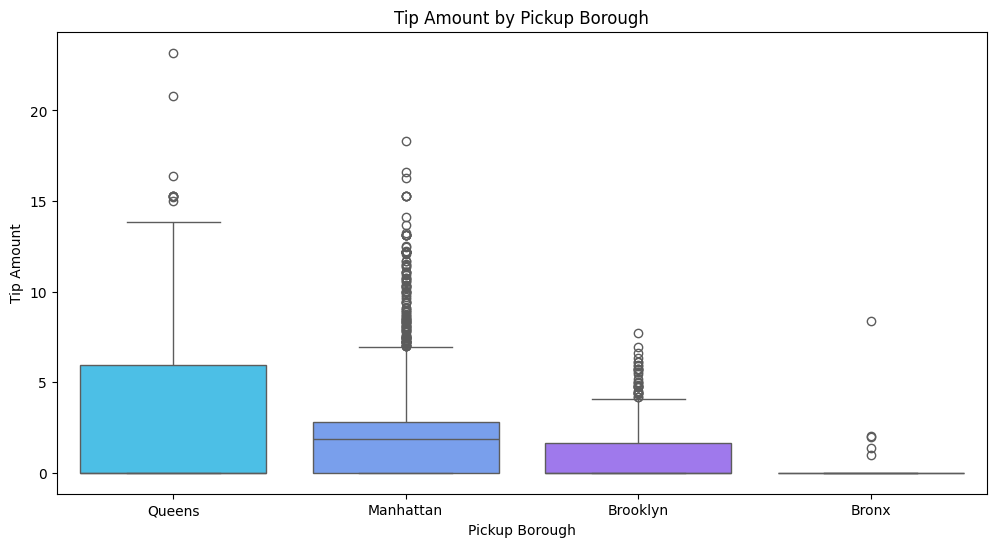

In [ ]:
# Plot a box plot to visualize the distribution of tip amounts for each pickup_borough
# Use pickup_borough as the categorical axis and tip as the numeric axis

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_borough', y='tip', data=df, palette='cool')

plt.xlabel('Pickup Borough')
plt.ylabel('Tip Amount')
plt.title('Tip Amount by Pickup Borough')
plt.show()



##Visualizations using Seaborn

**Count Plot**

/tmp/ipython-input-3258163294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_borough', data=df, palette='pastel')


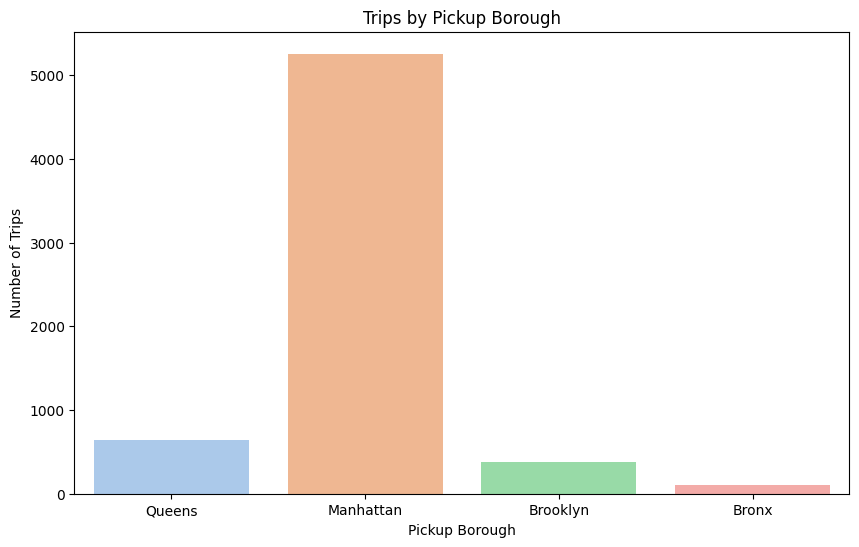

In [ ]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_borough', data=df, palette='pastel')

plt.xlabel('Pickup Borough')
plt.ylabel('Number of Trips')
plt.title('Trips by Pickup Borough')
plt.show()


**Scatter Plot**

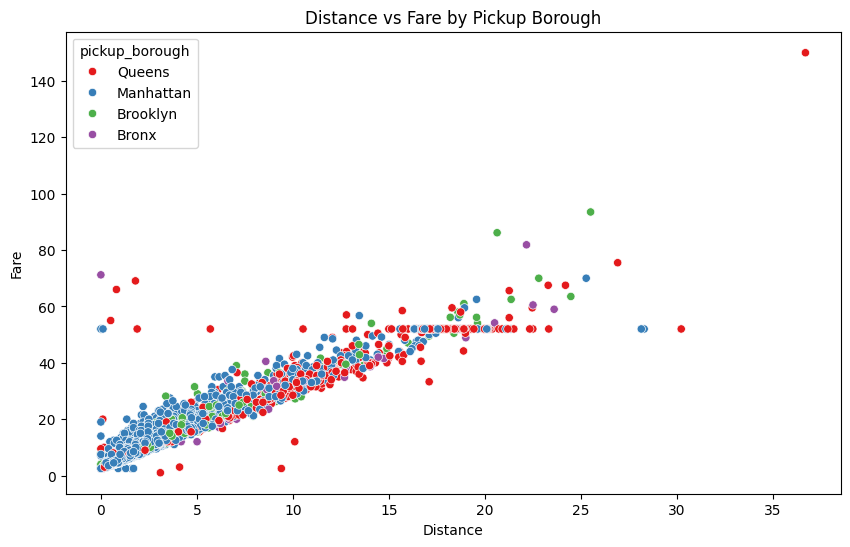

In [ ]:
 # Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='distance',
    y='fare',
    data=df,
    hue='pickup_borough',
    palette='Set1'
)

plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title('Distance vs Fare by Pickup Borough')
plt.show()


**Heatmap**

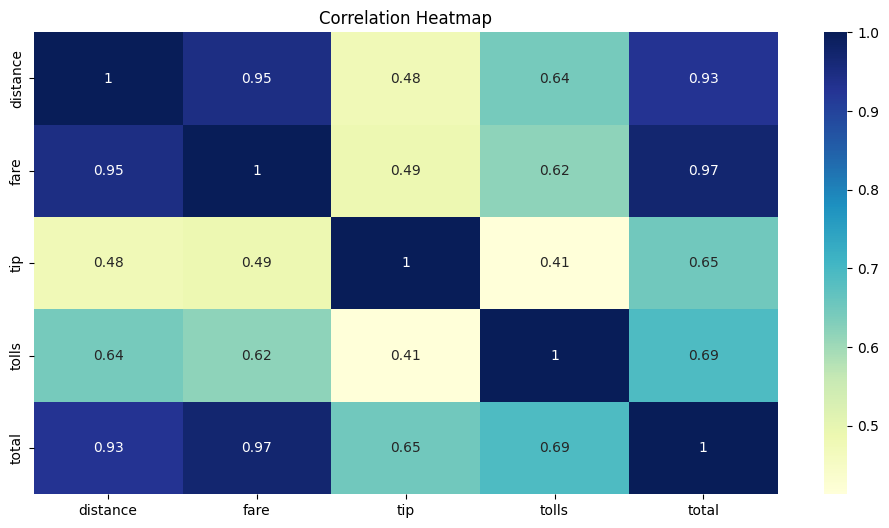

In [ ]:
# Correlation of numeric columns
cols = ['distance', 'fare', 'tip', 'tolls', 'total']
corr = df[cols].corr()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

plt.title('Correlation Heatmap')
plt.show()


**Pair Plot**

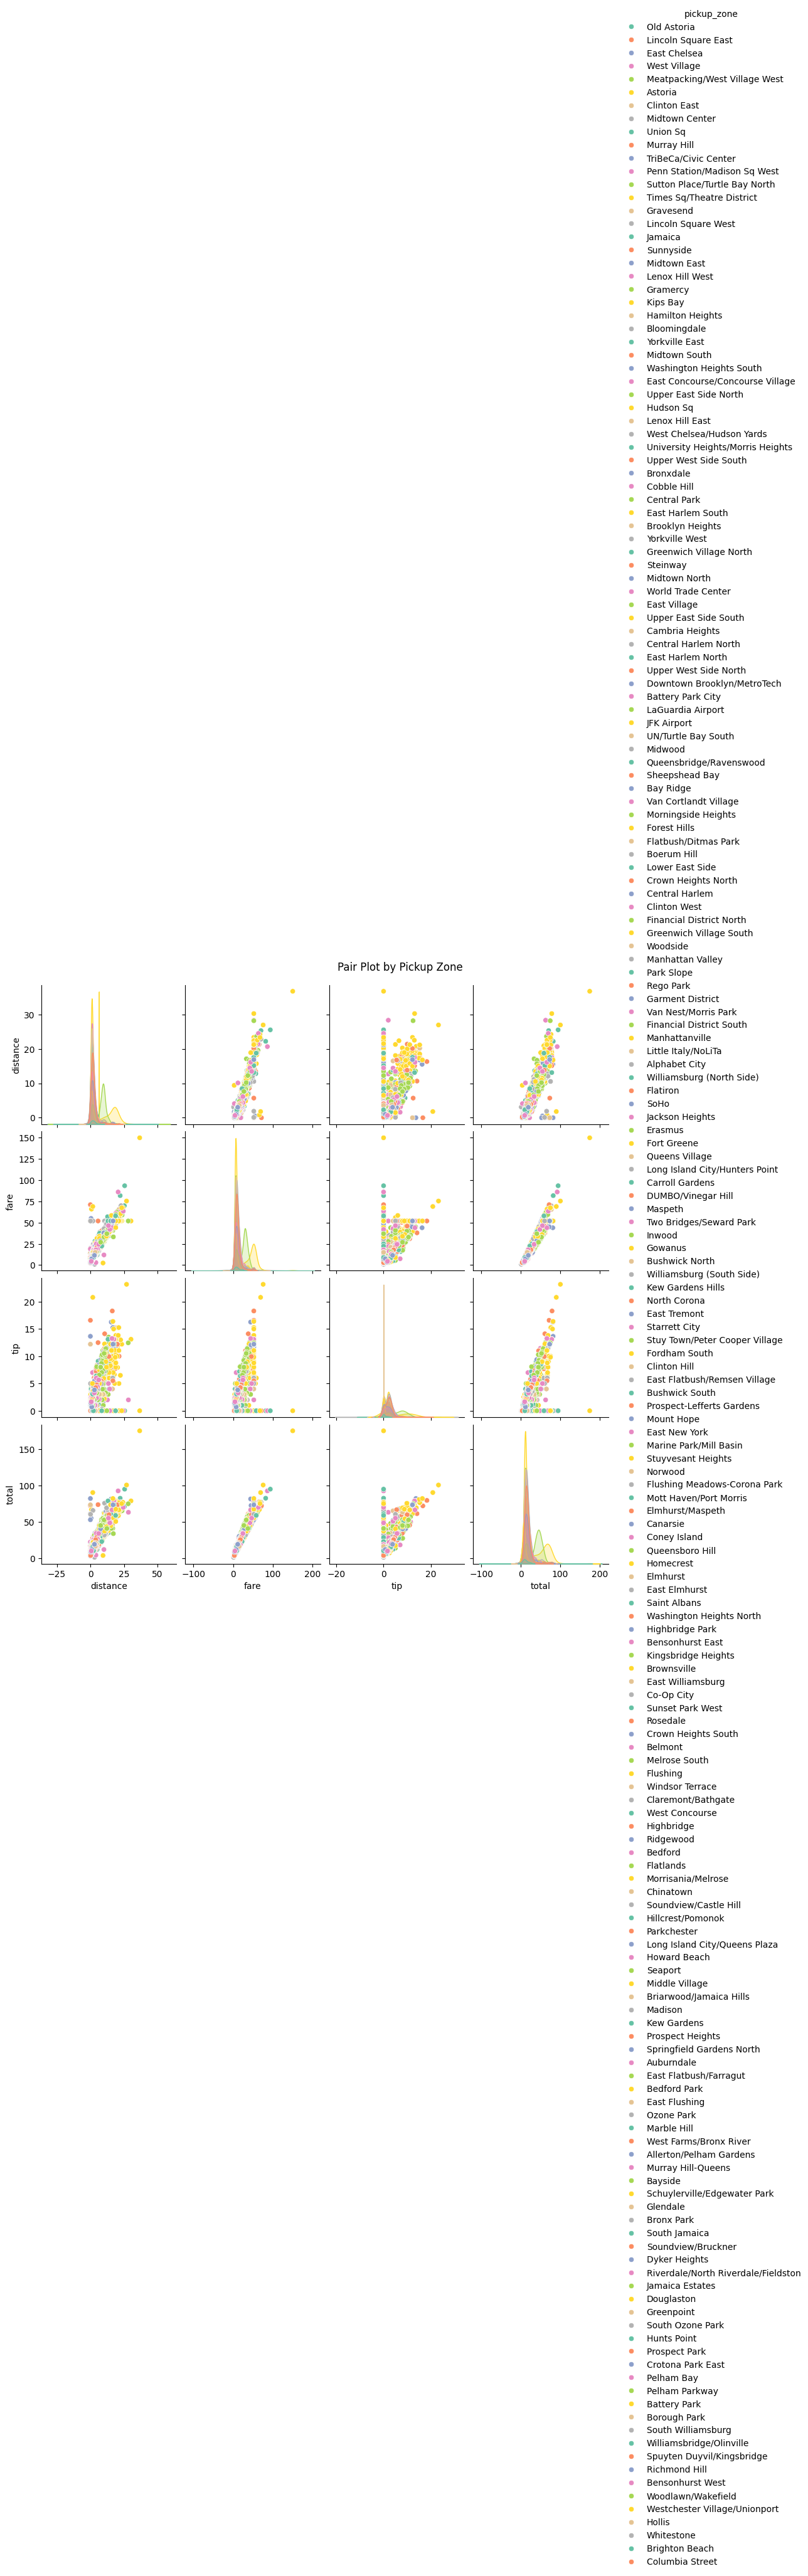

In [ ]:
 # Columns for pair plot
cols = ['distance', 'fare', 'tip', 'total']

# Pair plot
sns.pairplot(df, vars=cols, hue='pickup_zone', palette='Set2')

plt.suptitle('Pair Plot by Pickup Zone', y=1.02)
plt.show()


**Violin Plot**

/tmp/ipython-input-1417368016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='payment', y='fare', data=df, palette='Set3')


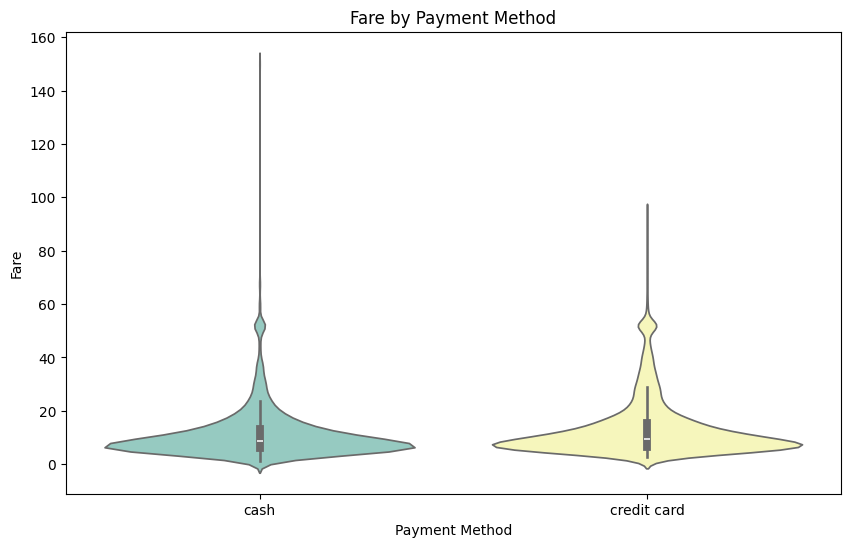

In [ ]:
# Violin plot of fare by payment method
plt.figure(figsize=(10, 6))
sns.violinplot(x='payment', y='fare', data=df, palette='Set3')

plt.xlabel('Payment Method')
plt.ylabel('Fare')
plt.title('Fare by Payment Method')
plt.show()
